In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/hp/Dropbox/My PC (LAPTOP-RN0UIHDT)/Downloads/Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [4]:
data.shape

(545, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [8]:
print(data['mainroad'].value_counts(),"\n")
print(data['guestroom'].value_counts(),"\n")
print(data['basement'].value_counts(),"\n")
print(data['hotwaterheating'].value_counts(),"\n")
print(data['airconditioning'].value_counts(),"\n")
print(data['furnishingstatus'].value_counts(),"\n")

yes    468
no      77
Name: mainroad, dtype: int64 

no     448
yes     97
Name: guestroom, dtype: int64 

no     354
yes    191
Name: basement, dtype: int64 

no     520
yes     25
Name: hotwaterheating, dtype: int64 

no     373
yes    172
Name: airconditioning, dtype: int64 

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64 



## Encoding the categorical variables

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [12]:
data['mainroad'] = le.fit_transform(data['mainroad'])
data['guestroom'] = le.fit_transform(data['guestroom'])
data['basement'] = le.fit_transform(data['basement'])
data['hotwaterheating'] = le.fit_transform(data['hotwaterheating'])
data['airconditioning'] = le.fit_transform(data['airconditioning'])
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])


In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


## Outlier Analysis 

13242879.999999896

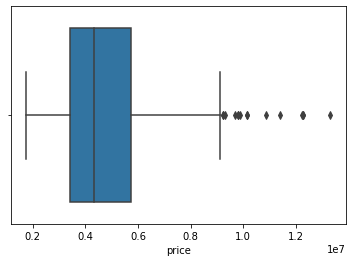

In [14]:
sns.boxplot(data.price,hue=data.area)
per99 = data.price.quantile(0.9999)
per99

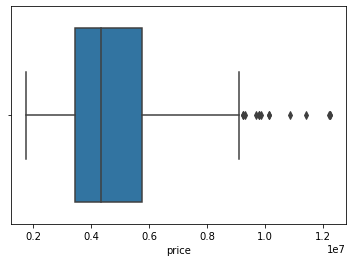

In [15]:
data = data[data.price<per99]
sns.boxplot(data.price)

## Data Viz

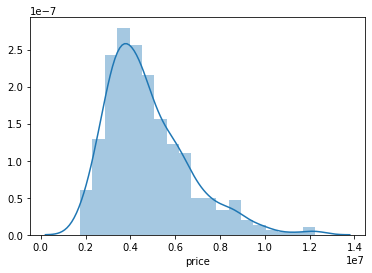

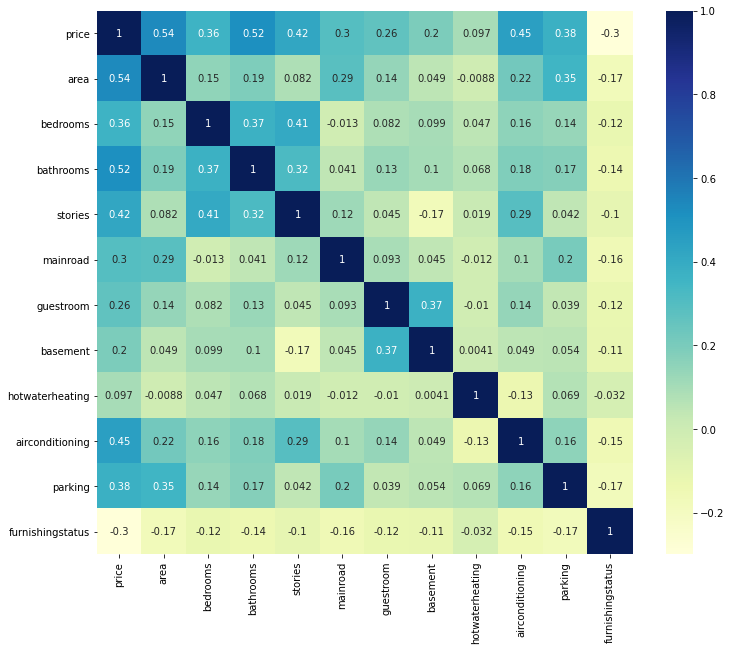

In [16]:
sns.distplot(data.price)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot = True,cmap = 'YlGnBu')

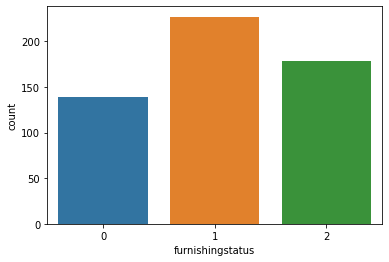

In [17]:
sns.countplot(x = data.furnishingstatus)

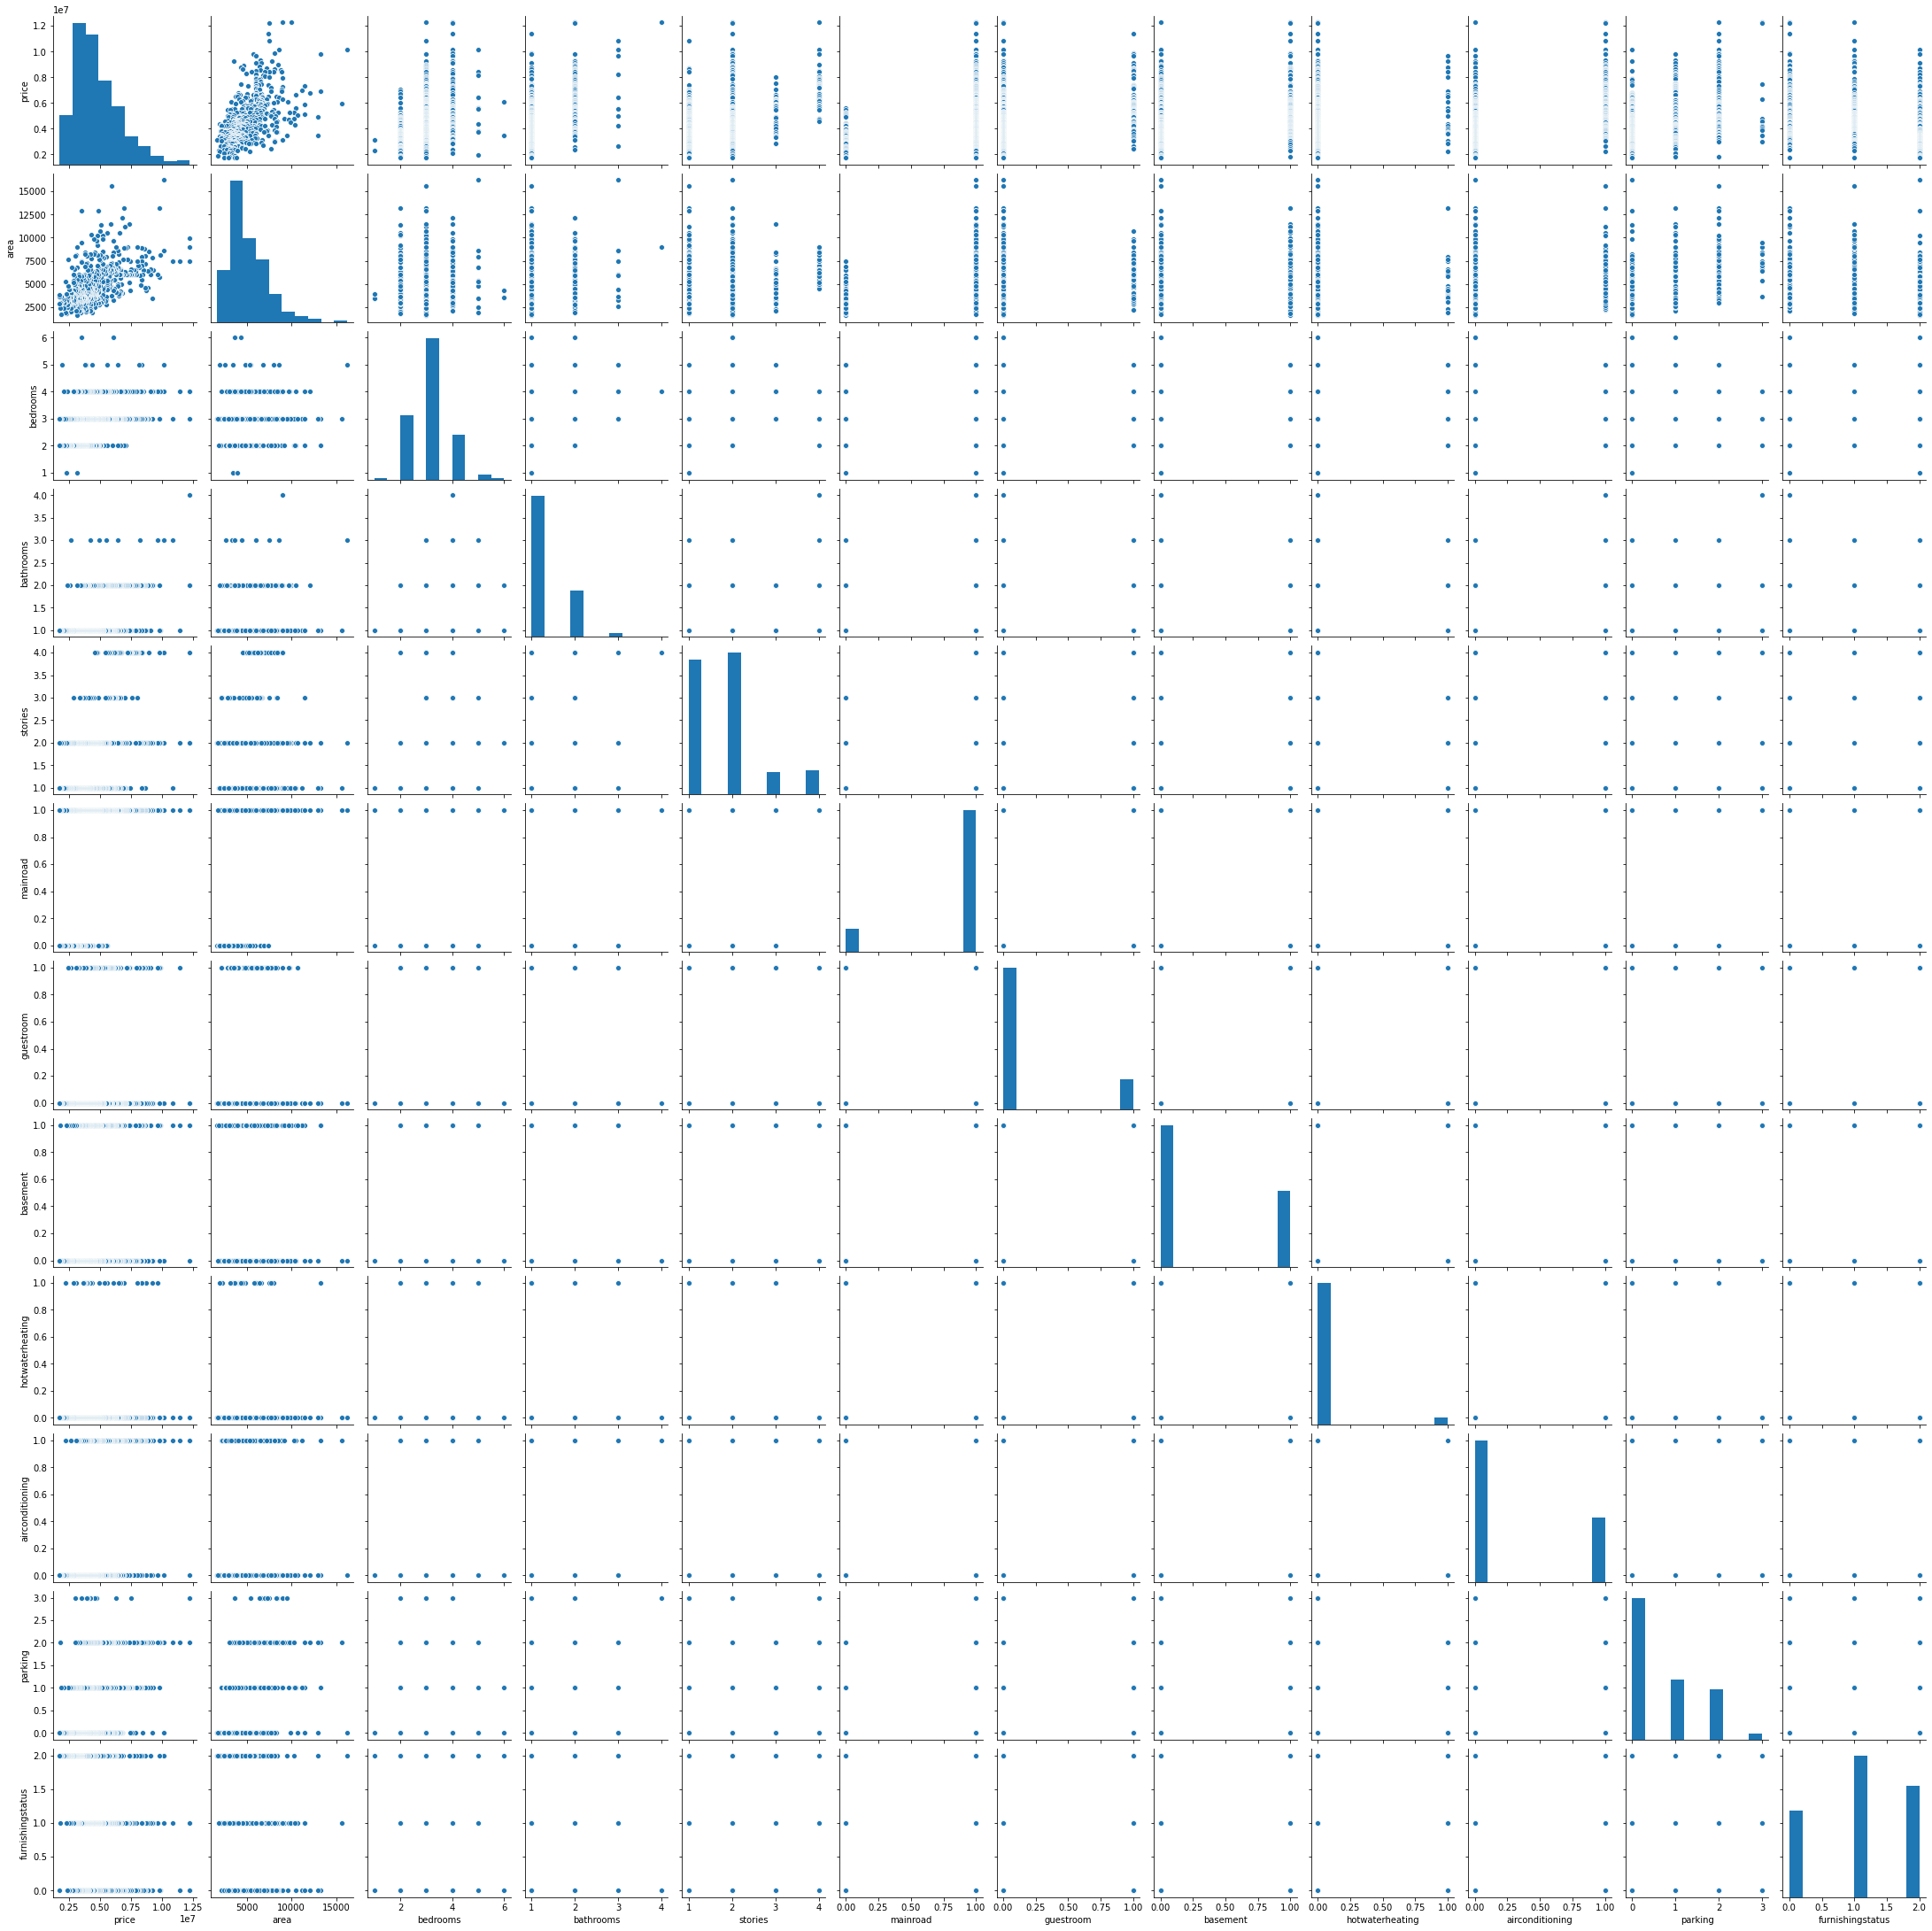

In [18]:
sns.pairplot(data)

In [19]:
data.shape

(544, 12)

## Splitting the data

In [20]:
X = data.iloc[:,1:]
y = data['price']
X.head()
names = X.columns
names

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

### Scaling the independent features.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() 

In [22]:
X_scaled = scale.fit_transform(X)
X = pd.DataFrame(X_scaled,columns = names)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
1,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
2,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,0.0
3,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0
4,0.402062,0.4,0.666667,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,0.5
...,...,...,...,...,...,...,...,...,...,...,...
539,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
540,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.5
541,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
542,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Splitting the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.26,random_state=41)
X_train.shape

(402, 11)

## Model Fitting and testing

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
lor = LogisticRegression()
lr = LinearRegression()

In [26]:
lor.fit(X_train,y_train)
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lor.predict(X_test)
y_pred_1 = lr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error,r2_score

In [29]:
mean_absolute_error(y_test,y_pred_1)

830639.8242059381

In [30]:
mean_absolute_error(y_test,y_pred)

1140682.042253521

In [31]:
mean_squared_error(y_test,y_pred)

2689524250862.6763

In [32]:
r2_score(y_test,y_pred)
r2_score(y_test,y_pred_1)

0.6285150056757018

In [33]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_1))
rmse

1128630.922073452

In [34]:
lr.predict([[0.36,0.8,0.4,0.9,0,0,1,1,0,0.62,0.5]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7821050.06408078])

In [35]:
lr.score(X_test,y_test)

0.6285150056757018

In [36]:
lr.coef_

array([4368289.71403368,  313295.53635548, 2975066.26917645,
       1382555.80858695,  434017.19740222,  304767.30792823,
        491307.012587  ,  693813.20854329,  821055.12041203,
        767151.42109462, -288664.79742247])

In [37]:
lr.intercept_

2047080.8990477151